In [1]:
# FILE: /home/jaime/PYTHON/tensorflow/Neural_Network_Regression_Tensorflow/NN_REG_TF_01
# Taken from:
# Neural Network for Regression with Tensorflow 
# https://www.analyticsvidhya.com/blog/2021/11/neural-network-for-regression-with-tensorflow/

In [2]:
# SEE (to solve problem with command: model = tf.keras.Sequential([tf.keras.layers.Dense(1)])):
# tf.keras.layers.Dense
# https://runebook.dev/es/docs/tensorflow/keras/layers/dense

In [11]:
# importing some libraries 

import tensorflow as tf
print(tf.__version__)
import numpy as np
import matplotlib.pyplot as plt

2.7.0


In [4]:
# We are dealing with a regression problem, and we will create our dataset:

X = np.arange(-110, 110, 3) 
y = np.arange(-100, 120, 3)

In [5]:
# One important point in NN is the input shapes and the output shapes. The input shape is the shape of the 
# data that we train the model on, and the output shape is the shape of data that we expect to come out of 
# our model. 
# Here we will use X and aim to predict y, so, X is our input and y is our output.

print("\nX.shape:\n", X.shape)                                      # JJVC
print("\nX:\n", X)                                                  # JJVC
print("\ny.shape:\n", y.shape)                                      # JJVC
print("\ny:\n", y)                                                  # JJVC
# X.shape, y.shape


X.shape:
 (74,)

X:
 [-110 -107 -104 -101  -98  -95  -92  -89  -86  -83  -80  -77  -74  -71
  -68  -65  -62  -59  -56  -53  -50  -47  -44  -41  -38  -35  -32  -29
  -26  -23  -20  -17  -14  -11   -8   -5   -2    1    4    7   10   13
   16   19   22   25   28   31   34   37   40   43   46   49   52   55
   58   61   64   67   70   73   76   79   82   85   88   91   94   97
  100  103  106  109]

y.shape:
 (74,)

y:
 [-100  -97  -94  -91  -88  -85  -82  -79  -76  -73  -70  -67  -64  -61
  -58  -55  -52  -49  -46  -43  -40  -37  -34  -31  -28  -25  -22  -19
  -16  -13  -10   -7   -4   -1    2    5    8   11   14   17   20   23
   26   29   32   35   38   41   44   47   50   53   56   59   62   65
   68   71   74   77   80   83   86   89   92   95   98  101  104  107
  110  113  116  119]


In [6]:
# Here we can see that our tensors have the same shape, but in real life, it may not be that way always, so, 
# we should check and fix that if needed before we build a model. Let’s start building our model with TensorFlow. 
# There are 3 typical steps to creating a model in TensorFlow:
#    • Creating a model – connect the layers of the neural network yourself, here we either use Sequential or 
#      Functional API, also we may import a previously built model that we call transfer learning.
#    • Compiling a model – at this step, we define how to measure a model’s performance, which optimizer should 
#      be used.
#    • Fitting a model – In this step, we introduce the model to the data and let it find patterns.
# We’ve created our dataset, that is why we can directly start modeling, but first, we need to split our train 
# and test set.

X_train = X[:60]
y_train = y[:60]
X_test = X[60:]
y_test = y[60:]
len(X_train), len(X_test)

(60, 14)

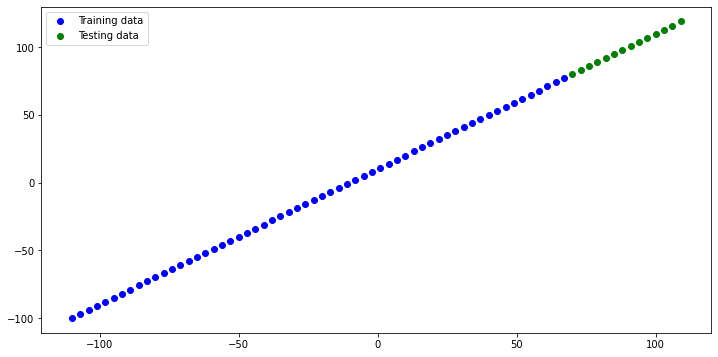

In [7]:
# The best way of getting more insight into our data is by visualizing it! So, let’s do it!

plt.figure( figsize = (12,6))
plt.scatter(X_train, y_train, c='b', label = 'Training data')
plt.scatter(X_test, y_test, c='g', label='Testing data')
plt.legend() 

In [15]:
# Building Regression model with Neural Network
# Now we can start to build some models.

#print("\nX_train.shape:\n", X_train.shape)                          # JJVC
#print("\nX_train:\n", X_train)                                      # JJVC
#print("\ny_train.shape:\n", y_train.shape)                          # JJVC
#print("\ny_train:\n", y_train)                                      # JJVC

print(type(y_train1[2]))
X_train2 = X_train.reshape(60,1)
y_train2 = y_train.reshape(60,1)
tf.random.set_seed(42)  #first we set random seed

model = tf.keras.Sequential([
                             tf.keras.layers.Dense(1)
])
model.compile( loss = tf.keras.losses.mae, optimizer = tf.keras.optimizers.SGD(), metrics = ['mae'])                         # JJVC
# mae stands for mean absolute error
# SGD stands for stochastic Gradient desense


print("\nmodel.fit( X_train, y_train, epochs = 10)\n")  
model.fit( X_train2, y_train, epochs = 10)

<class 'float'>

model.fit( X_train, y_train, epochs = 10)

Epoch 1/10
2/2 [==============================] - 0s 2ms/step - loss: 14.2691 - mae: 14.2691
Epoch 2/10
2/2 [==============================] - 0s 2ms/step - loss: 11.4816 - mae: 11.4816
Epoch 3/10
2/2 [==============================] - 0s 2ms/step - loss: 11.9457 - mae: 11.9457
Epoch 4/10
2/2 [==============================] - 0s 2ms/step - loss: 11.4454 - mae: 11.4454
Epoch 5/10
2/2 [==============================] - 0s 3ms/step - loss: 10.5982 - mae: 10.5982
Epoch 6/10
2/2 [==============================] - 0s 3ms/step - loss: 11.0030 - mae: 11.0030
Epoch 7/10
2/2 [==============================] - 0s 3ms/step - loss: 14.5563 - mae: 14.5563
Epoch 8/10
2/2 [==============================] - 0s 3ms/step - loss: 12.4001 - mae: 12.4001
Epoch 9/10
2/2 [==============================] - 0s 3ms/step - loss: 8.9780 - mae: 8.9780
Epoch 10/10
2/2 [==============================] - 0s 3ms/step - loss: 10.9169 - mae: 10.9169


In [20]:
# We have just built a model and trained it! What about checking its predictions?

model.predict([130])

array([[126.92796]], dtype=float32)

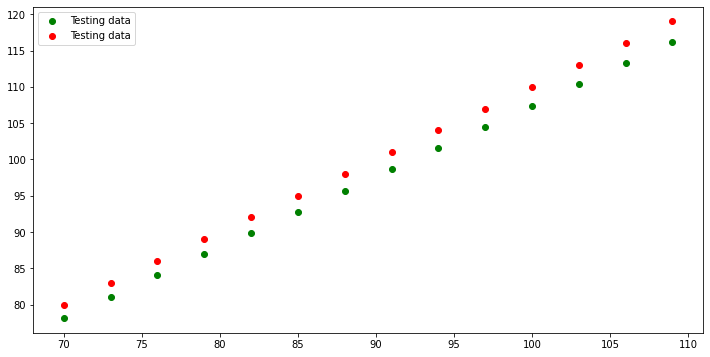

In [30]:

plt.figure( figsize = (12,6))

Y = [model.predict([i.item()]) for i in y_test]
plt.scatter(X_test, Y, c='g', label='Testing data')
plt.scatter(X_test, y_test, c='r', label='Testing data')
plt.legend() 

In [31]:
# The output should have been close to 140, it is not close enough, so let’s start to improve our model.

tf.random.set_seed(42)
model_1 = tf.keras.Sequential([tf.keras.layers.Dense(1)])
model_1.compile( loss = tf.keras.losses.mae, optimizer = tf.keras.optimizers.SGD(), metrics = ['mae'])
model_1.fit( X_train, y_train, epochs = 100, verbose = 0)

ValueError: in user code:

    File "/home/cacoch/DataScience/test/lib/python3.9/site-packages/keras/engine/training.py", line 878, in train_function  *
        return step_function(self, iterator)
    File "/home/cacoch/DataScience/test/lib/python3.9/site-packages/keras/engine/training.py", line 867, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/home/cacoch/DataScience/test/lib/python3.9/site-packages/keras/engine/training.py", line 860, in run_step  **
        outputs = model.train_step(data)
    File "/home/cacoch/DataScience/test/lib/python3.9/site-packages/keras/engine/training.py", line 808, in train_step
        y_pred = self(x, training=True)
    File "/home/cacoch/DataScience/test/lib/python3.9/site-packages/keras/utils/traceback_utils.py", line 67, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "/home/cacoch/DataScience/test/lib/python3.9/site-packages/keras/engine/input_spec.py", line 227, in assert_input_compatibility
        raise ValueError(f'Input {input_index} of layer "{layer_name}" '

    ValueError: Exception encountered when calling layer "sequential_5" (type Sequential).
    
    Input 0 of layer "dense_5" is incompatible with the layer: expected min_ndim=2, found ndim=1. Full shape received: (None,)
    
    Call arguments received:
      • inputs=tf.Tensor(shape=(None,), dtype=int64)
      • training=True
      • mask=None


In [ ]:
# Here we have increased the number of epochs to make our train longer. Also if we add
# “verbose = 0” we will not see the procedure of training (the procedure shown in the picture above). 
# Let’s check predictions again.

preds = model_1.predict(X_test)
preds

In [ ]:
# As I mentioned above, visualization always helps better to understand, 
# so let’s build a function and use it for visualization every time.

def plot_preds(traindata = X_train,
               trainlabels = y_train,
               testdata = X_test,
               testlabels = y_test,
               predictions = preds):
  plt.figure(figsize=(12,6))
  plt.scatter(traindata, trainlabels, c="b", label="Training data")
  plt.scatter(testdata, testlabels, c="g", label="Testing data")
  plt.scatter(testdata, predictions, c="r", label="Predictions")
  plt.legend()

In [ ]:
plot_preds(traindata = X_train,

           trainlabels = y_train,

           testdata = X_test,

           testlabels = y_test,

           predictions = preds)

# As we can see from the plot, our predictions are not perfect, but quite good as far. 
# Let’s evaluate predictions, then see if we can do better.

In [ ]:
# Evaluate the Regression Model with Neural Network
# For regression problems, we have 2 evaluation metrics, MAE(mean absolute error)  and MSE(mean squared error). 
# For our model we have used MAE, so, let’s compare predictions to the real values:

mae = tf.metrics.mean_absolute_error( y_true = y_test, y_pred = preds)
mae

In [ ]:
# What? MAE should be a single value, instead, we got 14 values, what is the reason for that? 
# This is the result of different shapes. let’s prove it.

y_test.shape, preds.shape

In [ ]:
# Yes, y_test and preds have different shapes, fortunately, we can fix it:

preds.squeeze().shape

In [ ]:
# Voila! let’s calculate the metrics again:

mae = tf.metrics.mean_absolute_error(y_true=y_test, y_pred=preds.squeeze()).numpy()
mse = tf.metrics.mean_squared_error(y_true = y_test, y_pred=preds.squeeze()).numpy()
mae, mse

# You may ask that, why we used  “numpy()” function at the end of the line. 
# I have done this on purpose because, in the end, we will convert our calculations into DataFrame.
# So, let’s keep working!

In [ ]:
# Improve the Regression model with neural network

tf.random.set_seed(42)
model_2 = tf.keras.Sequential([tf.keras.layers.Dense(1), tf.keras.layers.Dense(1)])
model_2.compile(loss=tf.keras.losses.mae, optimizer=tf.keras.optimizers.SGD(), metrics=['mae'])
model_2.fit(X_train, y_train, epochs=100, verbose=0)

In [ ]:
# Here we just replicated the first model, and add an extra layer to see how it works?

preds_2 = model_2.predict(X_test)
plot_preds(predictions=preds_2)

In [ ]:
mae_2 = tf.metrics.mean_absolute_error(y_true=y_test, y_pred=preds_2.squeeze()).numpy()
mse_2 = tf.metrics.mean_squared_error(y_true = y_test, y_pred=preds_2.squeeze()).numpy()
mae_2,mse_2

In [ ]:
# It seems like, extra layer didn’t help us to make our model better. Let’s try to change our optimizer.

tf.random.set_seed(42)
model_3 = tf.keras.Sequential([
  tf.keras.layers.Dense(1),
  tf.keras.layers.Dense(1)
])
model_3.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['mae'])
model_3.fit(X_train, y_train, epochs=100, verbose=0)

In [ ]:
# We have used “Adam()” optimizer instead of “SGD()”.

preds_3 = model_3.predict(X_test)
mae_3 = tf.metrics.mean_absolute_error(y_true=y_test, y_pred=preds_3.squeeze()).numpy()
mse_3 = tf.metrics.mean_squared_error(y_true = y_test, y_pred=preds_3.squeeze()).numpy()
mae_3,mse_3

In [ ]:
tf.random.set_seed(42)

model_4 = tf.keras.Sequential([tf.keras.layers.Dense(100), tf.keras.layers.Dense(10), tf.keras.layers.Dense(1)
m.set_seed(42)
model_4 = tf.keras.Sequential([tf.keras.layers.Dense(100), tf.keras.layers.Dense(10), tf.keras.layers.Dense(1)])
model_4.compile(loss=tf.keras.losses.mae, optimizer=tf.keras.optimizers.Adam(), metrics=['mae'])
mo
])

model_4.compile(loss=tf.keras.losses.mae, optimizer=tf.keras.optimizers.Adam(), metrics=['mae'])

model_4.fit(X_train, y_train, epochs=100, verbose=0)

In [ ]:
# This time we have added one extra layer and some extra neurons to make our predictions better. Let’s check it out.

preds_4 = model_4.predict(X_test)
plot_preds(predictions=preds_4)

In [ ]:
# We are getting close!

mae_4 = tf.metrics.mean_absolute_error(y_true=y_test, y_pred=preds_4.squeeze()).numpy()
mse_4 = tf.metrics.mean_squared_error(y_true = y_test, y_pred=preds_4.squeeze()).numpy()
mae_4,mse_4

In [ ]:
# In Neural Network we have 2 activation functions, Sigmoid and Relu. Let’s check them to see if they work for our model, or not:

tf.random.set_seed(42)
model_5 = tf.keras.Sequential([tf.keras.layers.Dense(10, activation = tf.keras.activations.relu), tf.keras.layers.Dense(1)])
model_5.compile(loss=tf.keras.losses.mae, optimizer=tf.keras.optimizers.Adam(), metrics=['mae'])
model_5.fit(X_train, y_train, epochs=100, verbose=0)

In [ ]:
# preds_5 = model_5.predict(X_test)

mae_5 = tf.metrics.mean_absolute_error(y_true=y_test, y_pred=preds_5.squeeze()).numpy()
mse_5 = tf.metrics.mean_squared_error(y_true = y_test, y_pred=preds_5.squeeze()).numpy()
mae_5, mse_5

In [ ]:
# It is always good to check more possible combinations, because, I promise, 
# this is the best way to both make better predictions and learn more each time.

tf.random.set_seed(42)
model_6 = tf.keras.Sequential([tf.keras.layers.Dense(100, activation = tf.keras.activations.relu), tf.keras.layers.Dense(10), tf.keras.layers.Dense(1)])
model_6.compile(loss=tf.keras.losses.mae, optimizer=tf.keras.optimizers.SGD(), metrics=['mae'])
model_6.fit(X_train, y_train, epochs=100, verbose=0)

In [ ]:
# Here we have just changed the optimizer to SGD() and checked its performance with the Relu activation function.

preds_6 = model_6.predict(X_test)
mae_6 = tf.metrics.mean_absolute_error(y_true=y_test, y_pred=preds_6.squeeze()).numpy()
mse_6 = tf.metrics.mean_squared_error(y_true = y_test, y_pred=preds_6.squeeze()).numpy()
mae_6, mse_6

In [ ]:
# And we have just made almost perfect predictions! Let’s see the evaluation process of our model:

model_results = [['model_1', mae, mse],
                 ['model_2', mae_2, mse_2],
                 ['model_3', mae_3, mse_3], 
                 ['model_4', mae_4, mse_4], 
                 ['model_5', mae_5, mse_5],
                 ['model_6', mae_6, mse_6]] 

In [ ]:
import pandas as pd

all_results = pd.DataFrame(model_results, columns=["model", "mae", "mse"])
all_results

In [ ]:
# Conclusion
# Together we created 6 different models and visualized and developed them. 
# The most important point I want to show in this article is that not every solution always works for every model and problem. 
# To find the optimal solution we need to practice and check. 
# It is only necessary to take into account that the neural network works completely like the human brain, 
# so there is no need to be afraid to look for the optimal solution by evaluating all the possible options. 
# After understanding and setting up models on similar problems several times, 
# you will be able to anticipate and use which API, which combination of parameters works best for which problem.

# I hope the article was useful to you.

# The media shown in this article are not owned by Analytics Vidhya and are used at the Author’s discretion.